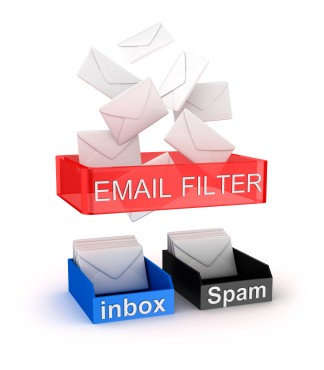

# Spam/Ham Classifer Model 

Each and every individual faces the problem of missing crucial e-mails because of the various unwanted emails recieved daily due to signing up with various websites for some or the other purposes.

This websites then keeping on sending us various updates and any change in their system through emails. So, at times it might happen that we miss our any important mails which need to be addressed as soon as possible.

So to overcome this in most better way,this model is designed to create filter of ham/spam mails.

# Algorithm Used :

## Logistic Regression:

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).

Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

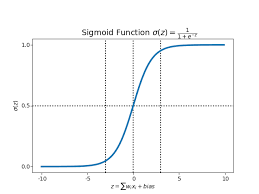

## Table of contents

1. [Importing Libraries and reading the data](#first)
2. [Data Cleaning](#second)
3. [Method 1 - Accuracy using Logistic Regression by just removing puntuations](#third)
4. [Method 2 - Snowball Stemmer](#fourth)
5. [Method 3 - Using Message Length](#fifth)
6. [Visualisations](#sixth)
7. [Word Cloud](#seventh)

# 1. Importing Libraries and reading the data
<a id="first"></a>

In [ ]:
import numpy as np
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import seaborn as sns
from plotly import graph_objs as go
import matplotlib as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [ ]:
message_data = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding = "latin")
message_data.head()

# 2. Data Cleaning
<a id="second"></a>

In [ ]:
message_data = message_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [ ]:
message_data = message_data.rename(columns = {'v1':'Spam/Not_Spam','v2':'message'})

In [ ]:
message_data.info()

In [ ]:
message_data.groupby('Spam/Not_Spam').describe()

In [ ]:
message_data_copy = message_data['message'].copy()

# 3. Method 1 - Accuracy using Logistic Regression by just removing puntuations
<a id="third"></a>

In [ ]:
def text_preprocess(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

In [ ]:
message_data_copy = message_data_copy.apply(text_preprocess)

In [ ]:
message_data_copy

In [ ]:
vectorizer = TfidfVectorizer("english")

## Vectorization: 

Use of vectorizer to fit the data. Fitting basicall means bringing the data into the format in a way its easy for further predictions

In [ ]:
message_mat = vectorizer.fit_transform(message_data_copy)
message_mat

In [ ]:
message_train, message_test, spam_nospam_train, spam_nospam_test = train_test_split(message_mat, 
message_data['Spam/Not_Spam'], test_size=0.3, random_state=20)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
Spam_model.fit(message_train, spam_nospam_train)
pred = Spam_model.predict(message_test)
accuracy_score(spam_nospam_test,pred)

# 4. Method 2 - Sonwball Stemmer
<a id="fourth"></a>

In [ ]:
def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [ ]:
message_data_copy = message_data_copy.apply(stemmer)
vectorizer = TfidfVectorizer("english")
message_mat = vectorizer.fit_transform(message_data_copy)

In [ ]:
message_train, message_test, spam_nospam_train, spam_nospam_test = train_test_split(message_mat, 
                                                        message_data['Spam/Not_Spam'], test_size=0.3, random_state=20)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
Spam_model.fit(message_train, spam_nospam_train)
pred = Spam_model.predict(message_test)
accuracy_score(spam_nospam_test,pred)

# 5. Method 3 - Using Message Length
<a id="fifth"></a>

In [ ]:
message_data['length'] = message_data['message'].apply(len)
message_data.head()

In [ ]:
length = message_data['length'].to_numpy()
new_mat = np.hstack((message_mat.todense(),length[:, None]))

In [ ]:
message_train, message_test, spam_nospam_train, spam_nospam_test = train_test_split(new_mat, 
                                                        message_data['Spam/Not_Spam'], test_size=0.3, random_state=20)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
Spam_model.fit(message_train, spam_nospam_train)
pred = Spam_model.predict(message_test)
accuracy_score(spam_nospam_test,pred)

# 6. Visualisations
<a id="sixth"></a>

## A. Bar plot for number of spam and ham messages

In [ ]:
import matplotlib.pyplot as plt
import csv

x = ['spam','ham']
y = []
file = '/kaggle/input/sms-spam-collection-dataset/spam.csv'
with open(file,'r',encoding = "ISO-8859-1") as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    s= 0
    h = 0

    for row in plots:
        if row[0] == 'spam':
            s += 1
        elif row[0] == 'ham':
            h += 1
    y = [s,h]
plt.bar(x, y, color='g', width=0.72, label="Mails")
plt.xlabel('Label')
plt.ylabel('Mails')
plt.legend()
plt.show()


## B. Pie chart for Percentage of spam and ham messages

In [ ]:
plt.pie(y,labels =x,autopct='%1.0f%%')
plt.title('Classified Mails')
plt.show()

## C. Hist plot for ham and spam messages

In [ ]:
plt.figure(figsize=(12, 8))

message_data[message_data['Spam/Not_Spam']=='ham'].length.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
message_data[message_data['Spam/Not_Spam']=='spam'].length.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

## D. Line plot

In [ ]:
ham_df = message_data[message_data['Spam/Not_Spam'] == 'ham']['length'].value_counts().sort_index()
spam_df = message_data[message_data['Spam/Not_Spam'] == 'spam']['length'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=ham_df.index,
    y=ham_df.values,
    name='ham',
    fill='tozeroy',
))
fig.add_trace(go.Scatter(
    x=spam_df.index,
    y=spam_df.values,
    name='spam',
    fill='tozeroy',
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Ham/Spam Classified</span>'
)
fig.update_xaxes(range=[0, 70])
fig.show()

# 7. Word Clouds
<a id="seventh"></a>

Data visualizations (like charts, graphs, infographics, and more) give businesses a valuable way to communicate important information at a glance, but what if your raw data is text-based? If you want a stunning visualization format to highlight important textual data points, using a word cloud can make dull data sizzle and immediately convey crucial information.

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
c_mask = np.array(Image.open('/kaggle/input/mask-images/comment_image.png'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=c_mask,
)
wc.generate(' '.join(text for text in message_data.loc[message_data['Spam/Not_Spam'] == 'ham', 'message']))
plt.figure(figsize=(18,10))
plt.title('Top words for HAM messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
c_mask = np.array(Image.open('/kaggle/input/mask-images/comment_image.png'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=c_mask,
)
wc.generate(' '.join(text for text in message_data.loc[message_data['Spam/Not_Spam'] == 'spam', 'message']))
plt.figure(figsize=(18,10))
plt.title('Top words for SPAM messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()